In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import minmax_scale
from project_helpers import shuffle_neighbors
%matplotlib inline

In [9]:
# data = np.random.laplace(size=(200, 2))
# data, color = make_blobs(n_samples=1000, centers=2, random_state=12, cluster_std=2.0)
data, color = make_moons(n_samples=300, noise=0.15, random_state=12)
data = minmax_scale(data)
data = np.array([data[:,0], data[:,1], color]).T

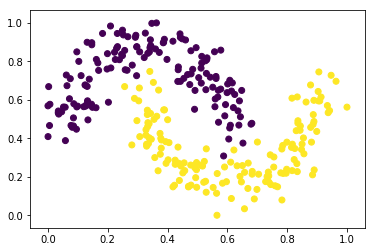

In [10]:
fig = plt.figure()
scatter = plt.scatter(data[:, 0], data[:, 1], c=data[:,2])

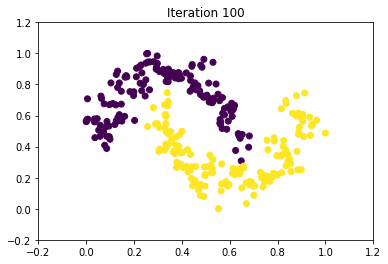

In [11]:
# https://matplotlib.org/examples/animation/moviewriter.html
IMWriter = manimation.writers.avail['imagemagick']
writer = IMWriter(fps=10, metadata={'title':'Moon Test'})

d = data

fig = plt.figure()
scatter = plt.scatter(d[:, 0], d[:, 1], c=d[:,2])
plt.title('Iteration 0')

margin = 0.2
plt.xlim(d[:,0].min() - margin, d[:,0].max() + margin)
plt.ylim(d[:,1].min() - margin, d[:,1].max() + margin)
with writer.saving(fig, "images/moon_scatter.gif", 100):
    for i in range(1, 101):
        d = shuffle_neighbors(d)
        d = d.copy()
        # d[:,0] += np.random.laplace(scale=0.02,size=d[:,0].shape)
        # d[:,1] += np.random.laplace(scale=0.02,size=d[:,1].shape)
        if (i % 1) == 0:
            scatter.remove()
            scatter = plt.scatter(d[:, 0], d[:, 1], c=d[:,2])
            plt.title('Iteration {}'.format(i))
            writer.grab_frame()